<a href="https://colab.research.google.com/github/krunal7558/learning-trading-strategies/blob/main/Stock_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock price analysis using moving averages

Project is for educational and learning purpose only. Aim is download historic trading data and calculate valrious moving averages and make BUY/SELL decision. It would download historic trading data of `watch_list` from Yahoo finance and store in CSV file. It would create pandas.DataFrame with new columns like SMA5 SMA15 and SMA30 for Simple moving averages and EMA12 and EMA26 for exponential moving averages. 

In [ ]:
watch_list = '''
ANET
ARKK
NET
TGT
FSLY
BNGO
BRK.B
CJT.TO
CLNE
CNQ
CNR
COUR
CRSR
CSCO
DELL
DLR
EBIT.TO
EQIX
GILT
GME
GPRO
HD
PANW
KXS
PLTR
LMND
LULU
MG.TO
MSFT
DIS
MU
NAKD
NFLX
FB
NVAX
PING
QUIK
RBLX
REAL
SCR
TEAM
TOU.TO
TREX
VCN
VOO
WMT
XL
FTNT
'''.strip().split()

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
from pathlib import Path
from datetime import datetime,timedelta
from typing import List
from prophet import Prophet

In [ ]:
# change your historic days here 
# This is not equal to number of trading days which is always less than that
HISTORIC_DAYS = 365

In [ ]:
# get date HISTORIC_DAYS before today
today = datetime.today()
historic_days = today - timedelta(days = HISTORIC_DAYS)
period1 = int(historic_days.timestamp())
period2 = int(today.timestamp())

In [ ]:
# downloading all symbols CSV files
for symbol in watch_list:
    url = f"https://query1.finance.yahoo.com/v7/finance/download/{symbol}?period1={period1}&period2={period2}&interval=1d&events=history&includeAdjustedClose=true"
    # logging.debug(url)
    try:
        urllib.request.urlretrieve(url,f"{symbol}.csv")
    except Exception as e:
        # logging.info(f"Issue with downloading URL {url}")
        print(f"Issue with downloading URL {url}")

Issue with downloading URL https://query1.finance.yahoo.com/v7/finance/download/BRK.B?period1=1604285708&period2=1635821708&interval=1d&events=history&includeAdjustedClose=true
Issue with downloading URL https://query1.finance.yahoo.com/v7/finance/download/KXS?period1=1604285708&period2=1635821708&interval=1d&events=history&includeAdjustedClose=true
Issue with downloading URL https://query1.finance.yahoo.com/v7/finance/download/VCN?period1=1604285708&period2=1635821708&interval=1d&events=history&includeAdjustedClose=true


In [ ]:
tickers = dict()
for symbol in watch_list:
    try:
        tickers[symbol] = pd.read_csv(f'{symbol}.csv',index_col="Date",parse_dates=True)
    except Exception as e:
        pass
        # Create empty data frame
        # tickers[symbol] = pd.DataFrame(columns=['Open','High','Low','Close','Adj Close','Volume'])

In [ ]:
def SimpleMovingAvg(data: pd.core.frame.DataFrame, period: int = 5, column: str = 'Close') -> pd.core.series.Series:
    return data[column].rolling(window=period).mean()
def EMA(data: pd.core.frame.DataFrame, period: int = 5, column: str = 'Close') -> pd.core.series.Series:
    return data[column].ewm(span=period).mean()
def Mean(*data):
    return sum(data)/len(data)

def Variance(*data):
    mean = Mean(*data)
    sum = 0
    for d in data: 
        sum = sum + ((d - mean)*(d - mean))
    return sum / (len(data) - 1)

def StochRSI(data: pd.core.frame.DataFrame, period: int = 5, column: str = 'Close') -> pd.core.series.Series:
    pass

In [ ]:
# calculate Daily Avg, Valatality, SMA5, SMA10 and SMA30 for each ticker 
for ticker in tickers.keys():
    tickers[ticker]['Daily Avg'] = Mean(tickers[ticker]["Open"], tickers[ticker]["Close"], tickers[ticker]["High"], tickers[ticker]["Low"], tickers[ticker]["Adj Close"])
    tickers[ticker]['Volatality'] = Variance(tickers[ticker]["Open"],tickers[ticker]["Close"],tickers[ticker]["High"],tickers[ticker]["Low"],tickers[ticker]["Adj Close"])
    tickers[ticker]['SMA5'] = SimpleMovingAvg(tickers[ticker],5,column="Daily Avg")
    tickers[ticker]['SMA15'] = SimpleMovingAvg(tickers[ticker],15,column="Daily Avg")
    tickers[ticker]['SMA30'] = SimpleMovingAvg(tickers[ticker],30,column="Daily Avg")
    tickers[ticker]['EMA12'] = EMA(tickers[ticker],12,column="Daily Avg")
    tickers[ticker]['EMA26'] = EMA(tickers[ticker],26,column="Daily Avg")

In [ ]:
for ticker in tickers:
    if tickers[ticker]['SMA5'][-1] > tickers[ticker]['SMA15'][-1] and  tickers[ticker]['SMA15'][-1] > tickers[ticker]['SMA30'][-1] and tickers[ticker]['SMA5'][-1] < max(tickers[ticker]['Close']):
        print(ticker)

ANET
ARKK
NET
TGT
FSLY
CLNE
CNQ
COUR
CSCO
DELL
DLR
EBIT.TO
EQIX
GME
HD
LULU
MSFT
NFLX
PING
QUIK
RBLX
TEAM
TOU.TO
VOO
WMT
FTNT


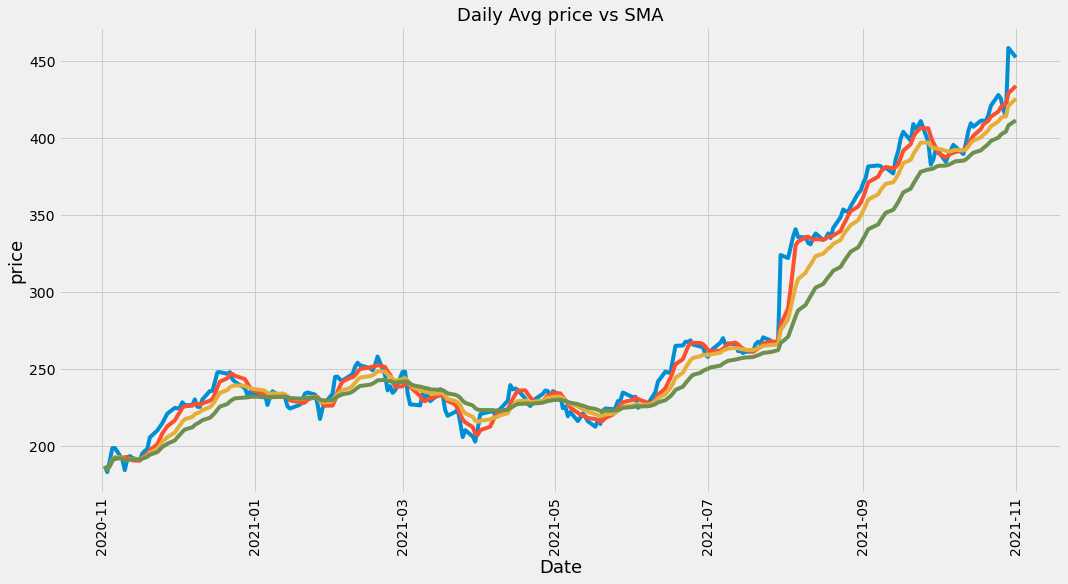

In [ ]:
# pretty charts for selected symbols 
df = tickers['TEAM']
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.title('Daily Avg price vs SMA',fontsize=18)
plt.plot(df['Daily Avg'])
plt.plot(df['SMA5'])
plt.plot(df['EMA12'])
plt.plot(df['EMA26'])
plt.xlabel('Date',fontsize=18,)
plt.xticks(rotation=90)
plt.ylabel('price',fontsize=18)
plt.show()